In [1]:
#importing required packages

import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading dataset
dataset=load_dataset('lukebarousse/data_jobs')
#forming a dataframe
df = dataset['train'].to_pandas()


#data cleanup converting date column to date timetype from string type.
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

df_DA_US= df[(df['job_title_short'] == 'Data Analyst') &( df['job_country']== 'United States')].copy()

/opt/anaconda3/envs/python_course/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns

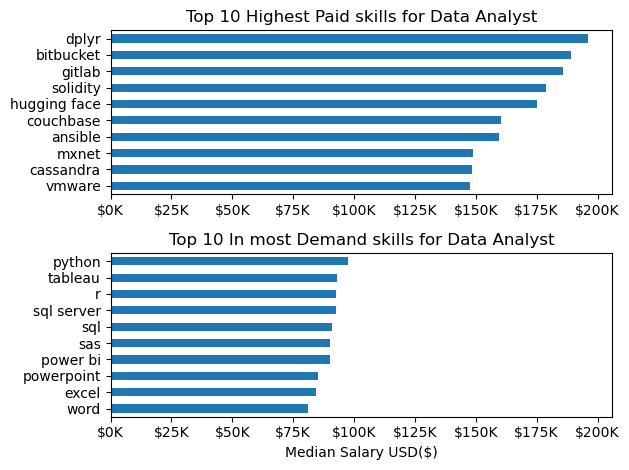

In [6]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US = df_DA_US.explode('job_skills')


df_skills=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_top_pay_skills = df_skills.sort_values(by='median', ascending = False).head(10)


df_top_count_skills = df_skills.sort_values(by='count', ascending = False).head(10).sort_values(by='median', ascending = False)

fig, ax = plt.subplots(2,1)
df_top_pay_skills[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K' ))

df_top_count_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 In most Demand skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary USD($)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K' ))

plt.tight_layout()

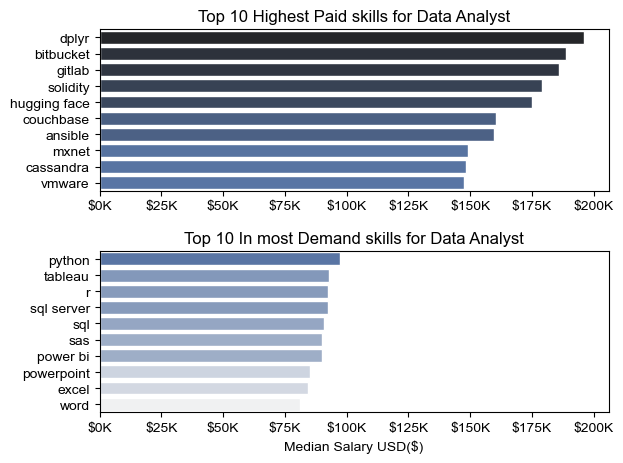

In [14]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
sns.barplot(data=df_top_pay_skills, x='median', y= df_top_pay_skills.index, ax=ax[0], hue='median', palette='dark:b_r')
#df_top_pay_skills[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend().remove()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K' ))

#df_top_count_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data=df_top_count_skills, x='median', y= df_top_count_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].set_title('Top 10 In most Demand skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary USD($)')
ax[1].legend().remove()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K' ))

plt.tight_layout()

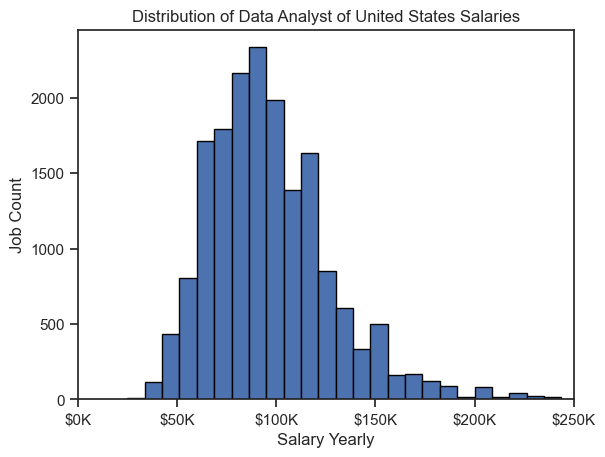

In [15]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0,250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K' ))
plt.title('Distribution of Data Analyst of United States Salaries')
plt.xlabel('Salary Yearly')
plt.ylabel('Job Count')
plt.show()

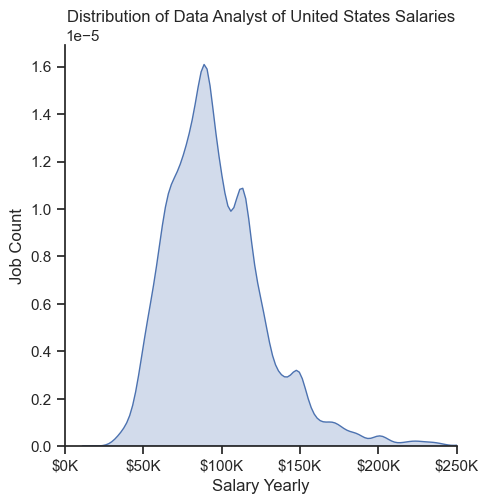

In [18]:

sns.set_theme(style='ticks')
sns.displot(df_DA_US['salary_year_avg'], kind = 'kde', fill=True)

plt.xlim(0,250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K' ))
plt.title('Distribution of Data Analyst of United States Salaries')
plt.xlabel('Salary Yearly')
plt.ylabel('Job Count')
plt.show()